# Text Analysis for Digital Humanities: Introduction

* * * 

<div class="alert alert-success">  
    
### Learning Objectives 
    
* Understand preprocessing and tokenization as preparatory steps in text analysis.
* Use the NLTK library to analyze the characteristic speech patterns of narrators in a play.
* Use TF-IDF to explore which plays are the most similar to each other.
* Use the Scikit-Learn library to explore prevalent topics or motifs in a play across narrative time.
* Use the Spacy library to do Named Entity Recognition, exploring how often certain times of day, places, or people are mentioned in a play.

</div>

### Icons Used in This Notebook
🔔 **Question**: A quick question to help you understand what's going on.<br>
🥊 **Challenge**: Interactive excersise. We'll work through these in the workshop!<br>
💡 **Tip**: How to do something a bit more efficiently or effectively.<br>
⚠️ **Warning:** Heads-up about tricky stuff or common mistakes.<br>
📝 **Poll:** A Zoom poll to help you learn!<br>
🎬 **Demo**: Showing off something more advanced – so you know what Python can be used for!<br> 

### Sections
1. [Introduction to Text Analysis](#intro)
2. [Tokenizing Text](#token)
3. [NLTK - Natural Language Toolkit](#nltk)
4. [Comparative Stylometry Using TF-IDF](#tfidf)
5. [Topic Modeling Using Scikit-Learn](#topic)
6. [Named Entity Recognition Using SpaCy](#ner)

<a id='intro'></a>
# Introduction to Text Analysis

Text analysis techniques lie in the domain of Natural Language Processing, where we apply computational techniques to human languages in order to explain underlying structures.

Performing computational methods on natural language is a question of representations. Language is understandable to humans because it is a system of communication tailored to our cognitive abilities, enabling us to encode and decode complex information through shared symbols and rules.

However, most machine learning and data science techniques utilize numerical methods to extract patterns from large datasets. This means we need to find a way to convert the language into a numerical representation. 

In this notebook, we will cover a variety of steps to "preprocess" and create numerical representations of text in order to do computational work.

<a id='token'></a>
# Tokenizing Text

Tokenization involves breaking down text into smaller units, such as words or phrases, to facilitate further analysis or processing in natural language tasks.

Recall a string in Python looks like this:

In [21]:
text = "I'm not superstitious. I have read a heap of books in my time. I am a scholar in my own way."

We can use the `.split()` method on a string to split it on a particular text character. By default, this is a whitespace, but `.split()` can also take other characters like a period (`.`).

Let's first split our string up in sentences.

In [53]:
sents = text.split('.')
sents

["I'm not superstitious",
 ' I have read a heap of books in my time',
 ' I am a scholar in my own way',
 '']

Note that the output of `.split()` is a list.

Now, let's split those sentences up into individual words. This means we have to apply `.split()` again to **each item in our list**. We are using a `for` loop here, written in what is called a ["list comprehension"](https://www.w3schools.com/python/python_lists_comprehension.asp). 

🔔 **Question**: Conceptually, can you explain how the list comprehension below comes to its output?

In [54]:
tokens = [sent.split() for sent in sents]
tokens

[["I'm", 'not', 'superstitious'],
 ['I', 'have', 'read', 'a', 'heap', 'of', 'books', 'in', 'my', 'time'],
 ['I', 'am', 'a', 'scholar', 'in', 'my', 'own', 'way'],
 []]

Because we are splitting up the items in our `sents` list further, we now have a **list of lists**. You can tell by the double `[[` and `]]` brackets at the start and end of `tokens`. 

Now we can access a token from this list of lists using indexing. 

In [24]:
tokens[1][1]

'I'

<a id='nltk'></a>
# NLTK - Natural Language Toolkit

It is useful to know how splitting up words using `.split()` works--but in practice, we do not work like this. Python has access to many Natural Language Processing (NLP) packages that have built-in tokenization methods that are more sophisticated, and easier to use.

Let's have a look at NLTK--the Natural Language Toolkit--which is a often-used package in the aacademic community for NLP work. First, we have to install it, as well as some dependencies.

In [36]:
%pip install nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/tomvannuenen/nltk_data...


True

Now, we can use the `.sent_tokenize()` method in NLTK to easily tokenize sentences:

In [27]:
nltk.sent_tokenize(text)

["I'm not superstitious.",
 'I have read a heap of books in my time.',
 'I am a scholar in my own way.']

Or we can use `.word_tokenize()` to tokenize words.

In [26]:
nltk.word_tokenize(text)

['I',
 "'m",
 'not',
 'superstitious',
 '.',
 'I',
 'have',
 'read',
 'a',
 'heap',
 'of',
 'books',
 'in',
 'my',
 'time',
 '.',
 'I',
 'am',
 'a',
 'scholar',
 'in',
 'my',
 'own',
 'way',
 '.']

Notice what happens there with "I'm"? What if our sentence contains a contraction? 

In [28]:
nltk.word_tokenize("I can't believe this!")

['I', 'ca', "n't", 'believe', 'this', '!']

🔔 **Question**: Why do you think NLTK is splitting up "ca" and "n't"?

## Stems and Stemming

Stemming is a text preprocessing technique that reduces words to their root form by removing prefixes and suffixes, often resulting in a basic, but sometimes grammatically incorrect, word form.

To stem a word, we first have to **instantiate**, or make a fresh copy of, our stemmer object: 

In [37]:
stemmer = nltk.stem.LancasterStemmer()

Now let's test it on three different forms of the same stem: 

In [38]:
for word in ["believe", "belief", "believing"]:
    print(stemmer.stem(word))

believ
believ
believ


In [39]:
stemmer.stem("believe")

'believ'

## Lemmas and Lemmatizers

A lemma is the "dictionary form" of a word, so the lemma for "jumps" is "jump." Lemmatizing often doesn't transform the text as much as stemming. First, instantiate the lemmatizer: 

In [40]:
lemmatizer = nltk.stem.WordNetLemmatizer()

In [41]:
lemmatizer.lemmatize("believe")

'believe'

In [42]:
for word in ["believe", "belief", "believing"]:
    print(lemmatizer.lemmatize(word))

believe
belief
believing


In [43]:
for word in ["happy", "happier", "happiest"]:
    print(lemmatizer.lemmatize(word))

happy
happier
happiest


In [44]:
for word in ["jumps", "jumping", "jump"]:
    print(lemmatizer.lemmatize(word))

jump
jumping
jump


In [49]:
for sentence in tokens:
    for token in sentence:
        print(lemmatizer.lemmatize(token))

I'm
not
superstitious

I
have
read
a
heap
of
book
in
my
time

I
am
a
scholar
in
my
own
way



## Things To Do With NLTK Text Objects

The NLTK Text object provides a convenient interface for exploring and analyzing a text.

Essentially, you feed it a text file (which takes the form of a string in Python), and it processes this text so that you can call a bunch of methods on that new object. It allows you to do things like concordancing, look for similar words to an input word, and show dispersion plots for given words. 

Let's have a look:

In [2]:
file_path = 'data/1895_wilde-oscar_the-importance-of-being-earnest.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

Concordance for the word 'brother':
Displaying 25 of 51 matches:
 always pretended to have a younger brother of the name of Ernest , who lives i
have invented a very useful younger brother called Ernest , in order that you m
 accepts me , I am going to kill my brother , indeed I think I 'll kill him in 
en propose for practice . I know my brother Gerald does . All my girl-friends t
nsense . Algernon : What about your brother ? What about the profligate Ernest 
! Jack : Very well , then . My poor brother Ernest was carried off suddenly , i
le too much interested in your poor brother Ernest ? Wo n't she feel his loss a
ts , that unfortunate young man his brother seems to be . But I must not distur
4 , The Albany , W. ' Uncle Jack 's brother ! Did you tell him Mr. Worthing was
 from your card , are Uncle Jack 's brother , my cousin Ernest , my wicked cous
 some terrible calamity ? Jack : My brother . Miss Prism : More shameful debts 
ack : [ -- ] Dead ! Chasuble : Your brother Ernest dead

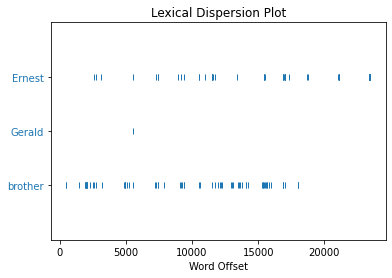

In [3]:
from nltk.text import Text
from nltk.tokenize import word_tokenize

# Assuming 'text' is your corpus as a single string
# Tokenize the corpus
tokens = word_tokenize(text)
# Create an NLTK Text object
nltk_text = Text(tokens)

# Example operations:
# 1. Concordance
print("Concordance for the word 'brother':")
nltk_text.concordance('brother')

# 2. Similar
print("\nWords similar to 'brother':")
nltk_text.similar('brother')

# 3. Common Contexts
print("\nCommon contexts for words 'brother' and 'Ernest':")
nltk_text.common_contexts(['brother', 'Ernest'])

# 4. Collocations
print("\nCollocations in the text:")
nltk_text.collocations()

# 5. Dispersion Plot
print("\nDispersion plot for words 'brother', 'Gerald', and 'Ernest':")
nltk_text.dispersion_plot(['brother', 'Gerald', 'Ernest'])


<a id='tfidf'></a>

# Comparative stylometry using TF-IDF

In [10]:
from nltk.corpus import gutenberg
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

**TF-IDF**: Term frequency, adjusted for inverse document frequency. 
 - Term frequency: the frequency with which words occur in your text
 - Inverse document frequency: the freq. with which words occur in your corpus. 
 
Or, a fancy way of getting distinguishing words of a document. At the moment, we'll be using the TfidfVectorizer, but we'll be turning off IDF, and just using it to make tables of word frequencies. 

Let's test it out on some of our plays.

In [40]:
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

boucicault_grimaldi = read_file('data/1853_boucicault-dion_grimaldi.txt')
boucicault_phantom = read_file('data/1856_boucicault-dion_the-phantom.txt')
yeats = read_file('data/1919_yeats-wb_the-only-jealousy-of-emer.txt')
wilde = read_file('data/1895_wilde-oscar_the-importance-of-being-earnest.txt')
shaw = read_file('data/1895_shaw-george-bernard_you-never-can-tell.txt')

In [41]:
tfidf = TfidfVectorizer(use_idf=False, max_features=800)

In [42]:
tf = tfidf.fit_transform([boucicault_grimaldi, boucicault_phantom, yeats, wilde, shaw])

In [43]:
tf

<5x800 sparse matrix of type '<class 'numpy.float64'>'
	with 2936 stored elements in Compressed Sparse Row format>

**Sparse matrix**: Matrix (table) with some values missing    
**Dense matrix**: That matrix filled in (think: fillna(0)). 

In [44]:
tfDense = tf.todense()

In [45]:
labels = tfidf.get_feature_names_out()

In [46]:
labels[658:670]

array(['subject', 'success', 'such', 'suddenly', 'suppose', 'sure',
       'surely', 'sweet', 'table', 'take', 'taken', 'takes'], dtype=object)

In [49]:
df = pd.DataFrame(tfDense, index=['Boucicault_Grimaldi', 'Boucicault_Phantom', 'Yeats', 'Wilde', 'Shaw'], columns=labels)

In [50]:
df

,able,about,absurd,accept,across,act,ada,afraid,after,afternoon,...,years,yes,yet,yonder,you,young,younger,your,yours,yourself
Boucicault_Grimaldi,0.001797,0.008983,0.000898,0.003593,0.001797,0.019762,0.000000,0.002695,0.003593,0.000000,...,0.005390,0.028745,0.007186,0.000000,0.377273,0.010779,0.000000,0.127554,0.008084,0.008084
Boucicault_Phantom,0.000000,0.005125,0.000000,0.001281,0.001281,0.006406,0.089681,0.000000,0.012812,0.000000,...,0.010249,0.021780,0.007687,0.019217,0.237014,0.008968,0.002562,0.071745,0.003843,0.001281
Yeats,0.000000,0.012317,0.000000,0.000000,0.000000,0.000000,0.000000,0.012317,0.012317,0.000000,...,0.003079,0.000000,0.015397,0.000000,0.203238,0.009238,0.000000,0.110857,0.000000,0.003079
Wilde,0.004682,0.041471,0.007358,0.000669,0.002676,0.004013,0.000000,0.010033,0.018060,0.010702,...,0.008027,0.040133,0.003344,0.000000,0.341129,0.012040,0.003344,0.084279,0.002676,0.001338
Shaw,0.002119,0.020839,0.000000,0.001766,0.002472,0.003885,0.000000,0.005298,0.013422,0.002119,...,0.005651,0.036733,0.007064,0.000000,0.328833,0.026490,0.002119,0.070288,0.003532,0.005651


## Stylometry?

Stylometry is the "measurement of style." It's a way to show how the style of writers is similar or different. Style, in this case, deals with the 800 most frequent words, which are function words, rather than content words—they show not what 

Or, comparison of most frequent words. 

In [51]:
tf.shape

(5, 800)

In [52]:
pca = PCA(2)

In [53]:
import numpy as np
tfArray = np.asarray(tfDense)

In [54]:
pcaOut = pca.fit_transform(tfArray)

In [55]:
pcaOut

array([[-0.13769126,  0.24636385],
       [ 0.11067257,  0.16625915],
       [ 0.36102033, -0.16687097],
       [-0.31862956, -0.23738216],
       [-0.01537207, -0.00836987]])

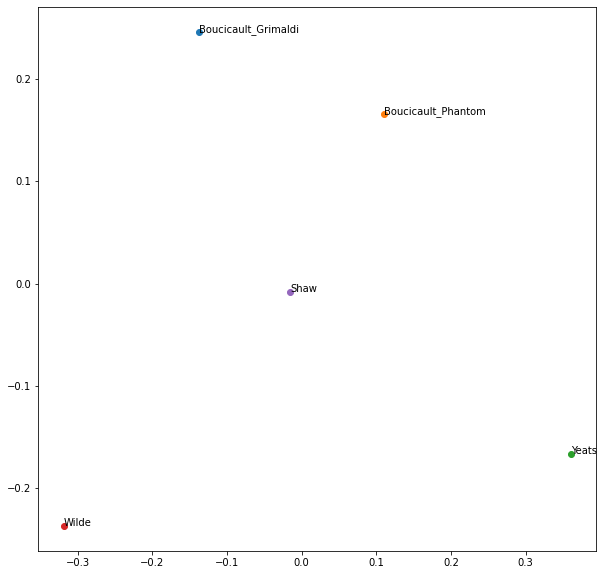

In [56]:
xs, ys = pcaOut[:,0], pcaOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(['Boucicault_Grimaldi','Boucicault_Phantom', 'Yeats', 'Wilde', 'Shaw'][i], (xs[i], ys[i]))

<a id='topic'></a>
# Topic Modeling using Scikit-Learn

Topic modeling is the umbrella term for several statistical methods that show coocurrences of groups of words irrespective of their positions in the text. These groups, or "topics," are computationally inferred probabilistically, not semantically, and so even though they are called topics, they don't always correspond to what we would consider a topic. 

A good, general-purpose introduction to topic modeling [can be found here](http://www.cs.columbia.edu/~blei/papers/Blei2012.pdf) via David Blei's website.

We will use Scikit-Learn, a machine learning package in Python, to do the topic modeling.

Topic modeling is very sensitive to lots of factors. First, it works best on many documents rather than just a few, since a topic is defined as that which is distributed across documents. So it's a good idea to break a text into equal-sized chunks, first. 

I'll start by defining a `split_text_into_chunks()` function to do that, to break up a text into chunks of about 2000 words each. 

In [202]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from nltk import word_tokenize
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

In [203]:
def split_text_into_chunks(text, chunk_size=2000):
    # Split the text into words
    words = text.split()
    
    # Calculate the number of chunks
    num_chunks = len(words) // chunk_size + (1 if len(words) % chunk_size > 0 else 0)
    
    # Split the words into chunks of the specified size
    chunks = [" ".join(words[i*chunk_size:(i+1)*chunk_size]) for i in range(num_chunks)]
    
    return chunks

shaw_chunks = split_text_into_chunks(shaw)

In [204]:
len(shaw_chunks)

17

In [221]:
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora
from gensim.utils import simple_preprocess

# Tokenize and preprocess documents
def preprocess(text):
    return [word for word in simple_preprocess(text) if word not in STOPWORDS]

# Preprocess the documents
processed_docs = [preprocess(doc) for doc in shaw_chunks]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(processed_docs)

# Create a bag-of-words model for each document
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]


In [222]:
from gensim.models import LdaModel

# Number of topics
num_topics = 3

# Train the model on the bag-of-words corpus
lda_model = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20)

In [223]:
import pandas as pd

# Initialize an empty list to hold the topic distribution for each document
topics_over_time = []

for document_bow in bow_corpus:
    # Get the topic distribution for the document
    document_topics = lda_model.get_document_topics(document_bow, minimum_probability=0)
    # Convert the topic distribution to a dictionary with topic ID as keys and probability as values
    topic_prob_dict = {topic: prob for topic, prob in document_topics}
    # Append the topic distribution dictionary to the list
    topics_over_time.append(topic_prob_dict)

# Create a DataFrame from the list of topic distribution dictionaries
df_topics_over_time = pd.DataFrame(topics_over_time).fillna(0)  # Fill missing values with 0s

<Axes: >

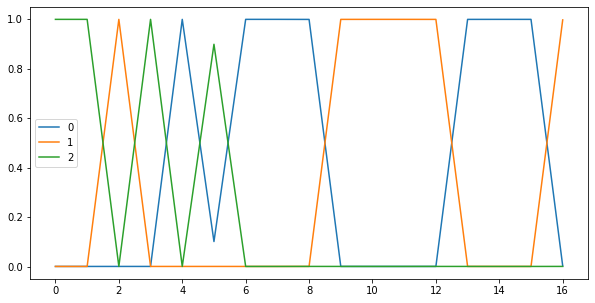

In [224]:
df_topics_over_time.plot()

In [226]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Prepare visualization
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, bow_corpus, dictionary)

# Display the visualization
vis

python(19655) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19657) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19658) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19659) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19660) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19661) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19662) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19663) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(19664) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.080005  0.029042       1        1  42.203696
1     -0.012069 -0.076906       2        1  33.806881
2     -0.067936  0.047864       3        1  23.989423, topic_info=          Term        Freq       Total Category  logprob  loglift
490        sir  205.000000  205.000000  Default  30.0000  30.0000
1915    waiter  141.000000  141.000000  Default  29.0000  29.0000
1408  crampton  238.000000  238.000000  Default  28.0000  28.0000
148      dolly  228.000000  228.000000  Default  27.0000  27.0000
3504     bohun   77.000000   77.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
579         ve    9.775602   36.694247   Topic3  -5.9421   0.1048
603        yes   11.265247   85.640045   Topic3  -5.8003  -0.6009
282       know   10.181606   58.468653   Topic3  -5.9014  -0.3204
541      thank    9.671256   41.772557   Topic3  -5.9528  -0.0355
490        sir   10.234588  205.968156   Topic3  -5.8962  -1.5744

[240 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1060      2  0.936603  accepted
1066      2  0.890810    advice
1071      1  0.224846        ah
1071      2  0.786960        ah
617       3  0.798870     alive
...     ...       ...       ...
603       2  0.233536       yes
603       3  0.128445       yes
604       1  0.368514     young
604       2  0.184257     young
604       3  0.452267     young

[333 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

<a id='ner'></a>
# Named Entity Recognition Using SpaCy

SpaCy is a natural language processing library, similar to the NLTK in some respects, but with many notable differences. 
 - Where the NLTK is meant for teaching and learning natural language processing, SpaCy is designed for industrial applications (i.e. designed for speed and accuracy, not necessarily ease-of-use). 
 - Instead of performing each function separately (`word_tokenize`, `pos_tag`, `lemmatize`), SpaCy does everything all at once. This has advantages and disadvantages. For example, processing with SpaCy takes a long time. But once a text is processed, no further processing is necessary—it just becomes a matter of accessing the data that's already there. 
 - Because SpaCy stores a *lot* of data about each text, this can easily lead to memory overflow errors. An easy way around this is to break the text up into individual parts, and to use functions wherever possible, to limit the amount of data stored in memory. It helps if you have a computer with a lot of RAM. You can also randomly sample chunks of text (like 1000-word chunks) at a time, and then take the average of all your random trials at the end. 
 - While the NLTK's natural language processing is deterministic (built on human understanding of how language works), it's not quite as accurate as SpaCy's probabilistic (built on machine understanding of language) approach. 
 
At the moment, SpaCy is the fastest, and almost the most accurate parser available. 

First, load your language model, and store it as the variable `nlp`, which can then be run as a function: 
   

In [230]:
import spacy
spacy.cli.download('en_core_web_sm')
nlp = spacy.load('en_core_web_sm')

python(19988) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 33.1 MB/s eta 0:00:0031m29.4 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


Now let's get a text to play around with.

Process it using SpaCy: 

In [231]:
doc = nlp(wilde)

### Exploring our SpaCy Doc

Now we can start to explore what we can do with the resulting Doc object: 

In [232]:
type(doc)

spacy.tokens.doc.Doc

Here are some things that we can do with this object: 

In [234]:
[method for method in dir(doc) if not method.startswith('_')]

['cats',
 'char_span',
 'copy',
 'count_by',
 'doc',
 'ents',
 'extend_tensor',
 'from_array',
 'from_bytes',
 'from_dict',
 'from_disk',
 'from_docs',
 'from_json',
 'get_extension',
 'get_lca_matrix',
 'has_annotation',
 'has_extension',
 'has_unknown_spaces',
 'has_vector',
 'is_nered',
 'is_parsed',
 'is_sentenced',
 'is_tagged',
 'lang',
 'lang_',
 'mem',
 'noun_chunks',
 'noun_chunks_iterator',
 'remove_extension',
 'retokenize',
 'sentiment',
 'sents',
 'set_ents',
 'set_extension',
 'similarity',
 'spans',
 'tensor',
 'text',
 'text_with_ws',
 'to_array',
 'to_bytes',
 'to_dict',
 'to_disk',
 'to_json',
 'to_utf8_array',
 'user_data',
 'user_hooks',
 'user_span_hooks',
 'user_token_hooks',
 'vector',
 'vector_norm',
 'vocab']

We can also get the length (in tokens) of the text: 

In [235]:
len(doc)

24782

SpaCy allows us to iterate over the text's words, as if the Doc were a list of tokens: 

In [236]:
for word in doc[40:50]:
    print(word)

Lane
is
arranging
afternoon
tea
on
the
table
,
and


We can get a single word, too, so that we can do things with that individual word (token): 

In [245]:
arranging = doc[42]
arranging

arranging

### Exploring SpaCy Words

SpaCy words are *objects*, rather than strings, and so they contain a lot of information that can be accessed via their many methods. Here are a few things you can do with them: 

In [247]:
[method for method in dir(arranging) if not method.startswith('_')]

['ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_kb_id',
 'ent_kb_id_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_dep',
 'has_extension',
 'has_head',
 'has_morph',
 'has_vector',
 'head',
 'i',
 'idx',
 'iob_strings',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_end',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'left_edge',
 'lefts',
 'lemma',
 'lemma_',
 'lex',
 'lex_id',
 'like_email',
 'like_num',
 'like_url',
 'lower',
 'lower_',
 'morph',
 'n_lefts',
 'n_rights',
 'nbor',
 'norm',
 'norm_',
 'orth',
 'orth_',
 'pos',
 'pos_',
 'prefix',
 'prefix_',
 'prob',
 'rank',
 'remove_extension',
 'right_edge',
 'rights',
 'sent',
 'sent_start',
 'sentiment',
 'set_extension',
 'set_morph',
 'shape',
 'sh

You can get the word's POS (as in the NLTK's `pos_tag()` function), like this: 

In [248]:
arranging.tag_

'VBG'

Or a less specific tag (`VERB`, `NOUN`, `PUNCT`, etc.), like this: 

In [249]:
arranging.pos_

'VERB'

(`.tag` and `.pos`, without the underscores, are numeric representations of these. You can use those if you don't care about human readability, and want your code to be a little faster.)

You can also get the lemma for the word, which is its "dictionary form": 

In [250]:
arranging.lemma_

'arrange'

With punctuation, like this comma, you can see how the `.tag` and the `.pos` properties differ: 

One caveat: the word *object* is distinct from the word's string, so to count these, or otherwise treat them as strings, we first have to extract their text: 

## Named Entity Recognition

Named entity recognition, or NER, is a subfield of natual language processing that deals with the automatic identification of people, places, things, and other related "names." This sometimes includes numbers, dates, and other things. You can tell whether a word is a named entity, and if so, what type of entity it is, like this: 

In [252]:
arranging.ent_type_

''

Explore the types of entities in a subset of words of our text: 

In [254]:
for word in doc[50:250]: 
    if len(word.text.strip()) > 0 and len(word.ent_type_) > 0: 
        print(word.text.strip(), ':', word.ent_type_)

Lane : PERSON
Lane : PERSON
Lane : PERSON
Lady : PERSON
Bracknell : PERSON
Lane : PERSON
two : CARDINAL
Lane : PERSON
Thursday : DATE
night : TIME
eight : CARDINAL
Lane : PERSON
eight : CARDINAL


We can extract places like this: 

In [255]:
for word in doc[:2000]: 
    if len(word.ent_type_) > 0: 
        if word.ent_type_ == 'GPE': 
            print(word)

Shropshire
Shropshire
Gwendolen
Gwendolen
Gwendolen
Cecily
Cecily


And times like this: 

In [265]:
for word in doc[:4000]: 
    if len(word.ent_type_) > 0: 
        if word.ent_type_ == 'TIME': 
            print(word)

Morning
afternoon
night
five
o'clock
tonight
tonight
ten
minutes
afternoon


Alternatively, we can write this as a list comprehension: 

In [257]:
times = [word.text for word in doc if word.ent_type_ == 'TIME']

In [258]:
type(times)

list

We can count our list of times, put this into a Pandas Series, and plot them, to try to show what kinds of times occur most often in Betteredge's narrative: 

<Axes: >

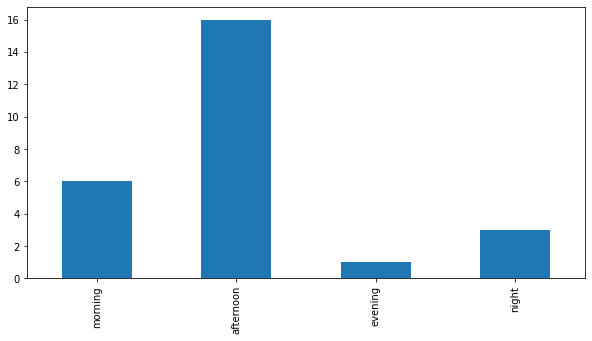

In [266]:
from collections import Counter

pd.Series(Counter(times))[['morning', 'afternoon',
                           'evening', 'night']].plot(kind='bar')

And we can also see how frequently times and dates occur in narrative time. 

<Axes: >

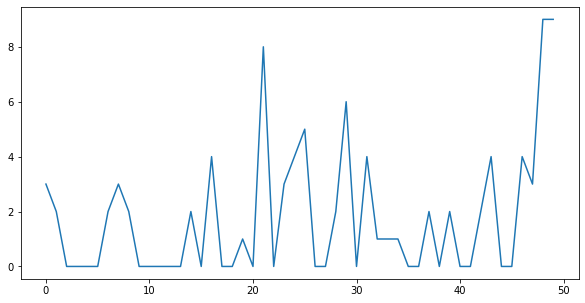

In [269]:
times = pd.Series(np.histogram([word.i for word in doc if word.ent_type_ == 'TIME'], bins=50)[0])
times.plot()